<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-05-07 07:27:56--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  54.4MB/s    in 3.7s    

2025-05-07 07:28:01 (54.9 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


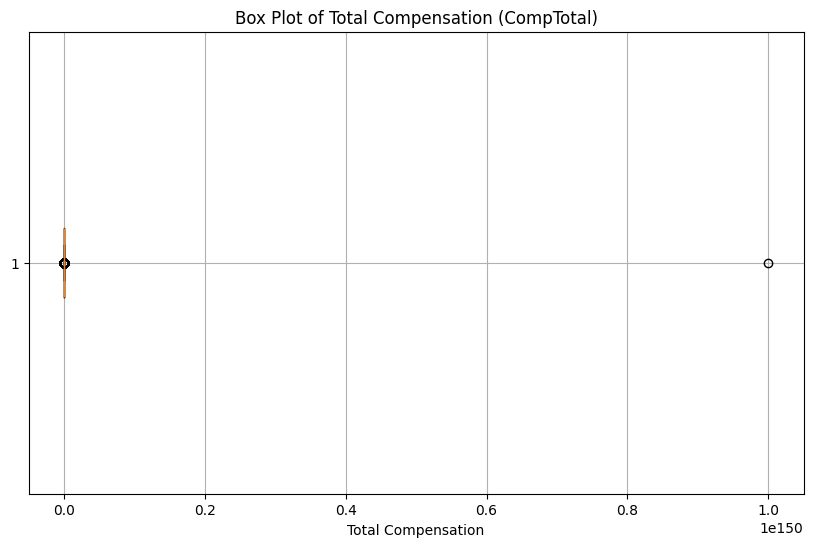

In [8]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')

# Query to select CompTotal
QUERY = "SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL"

# Load data into a DataFrame
df = pd.read_sql_query(QUERY, conn)

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['CompTotal'].dropna(), vert=False)
plt.title('Box Plot of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.grid(True)
plt.show()

# Close the database connection
conn.close()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


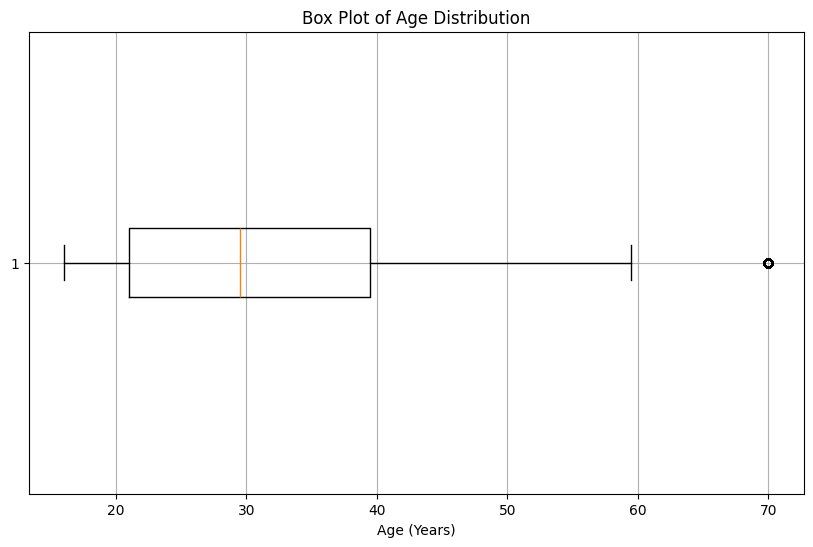

In [9]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')

# Query to select Age
QUERY = "SELECT Age FROM main WHERE Age IS NOT NULL"

# Load data into a DataFrame
df = pd.read_sql_query(QUERY, conn)

# Define a function to convert age ranges to numerical values (midpoints)
def convert_age_to_numeric(age):
    if age == 'Under 18 years old':
        return 16  # Approximate midpoint for <18
    elif age == '18-24 years old':
        return 21  # Midpoint of 18-24
    elif age == '25-34 years old':
        return 29.5  # Midpoint of 25-34
    elif age == '35-44 years old':
        return 39.5  # Midpoint of 35-44
    elif age == '45-54 years old':
        return 49.5  # Midpoint of 45-54
    elif age == '55-64 years old':
        return 59.5  # Midpoint of 55-64
    elif age == '65 years or older':
        return 70  # Approximate for 65+
    else:
        return None  # Handle unexpected values

# Apply the conversion to the Age column
df['Age_numeric'] = df['Age'].apply(convert_age_to_numeric)

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['Age_numeric'].dropna(), vert=False)
plt.title('Box Plot of Age Distribution')
plt.xlabel('Age (Years)')
plt.grid(True)
plt.show()

# Close the database connection
conn.close()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


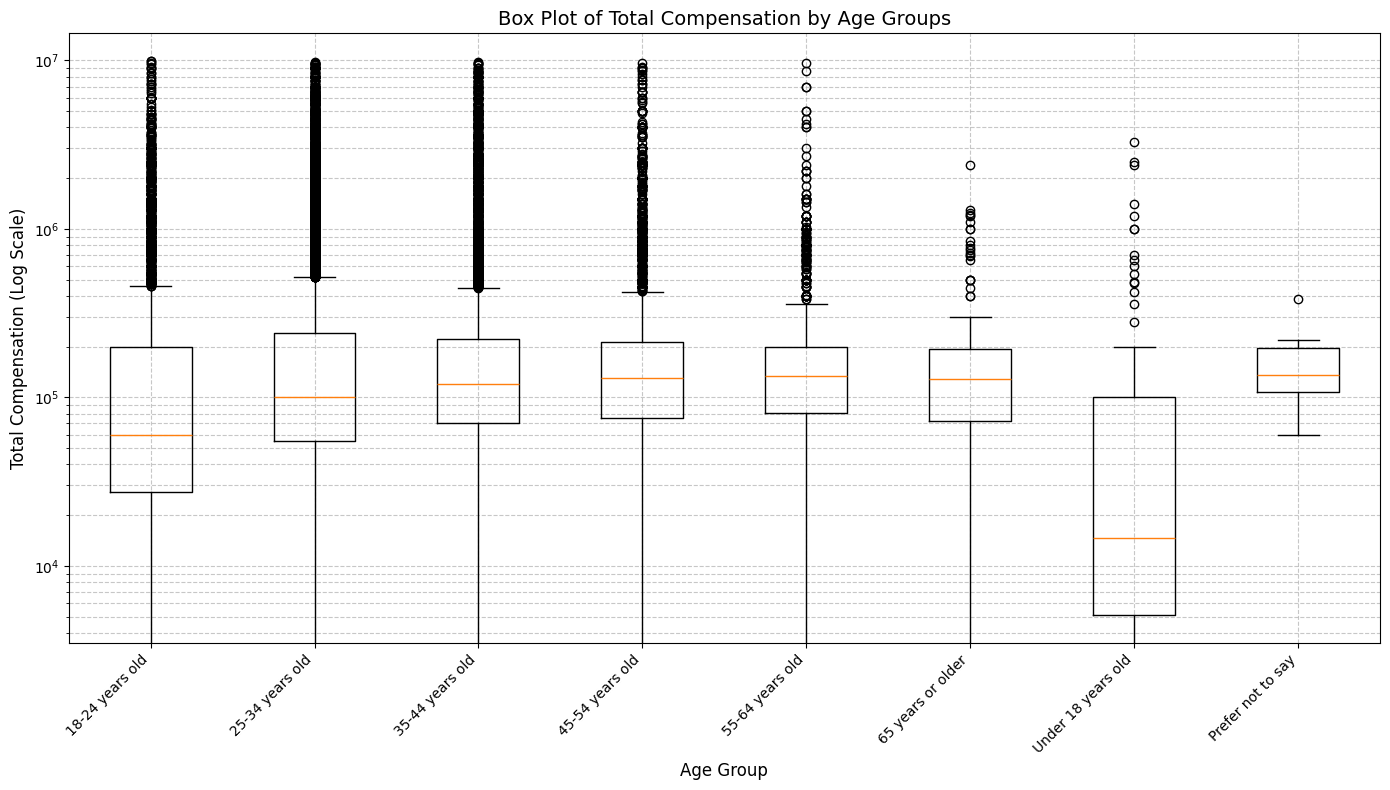

In [12]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')

# Query to select CompTotal and Age
QUERY = """
SELECT CompTotal, Age 
FROM main 
WHERE CompTotal IS NOT NULL AND Age IS NOT NULL
"""

# Load data into a DataFrame
df = pd.read_sql_query(QUERY, conn)

# Ensure CompTotal is numeric, drop non-numeric values
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal', 'Age'])

# Optionally filter out extreme outliers (e.g., keep values within a reasonable range)
# Adjust the threshold as needed based on data inspection
df = df[df['CompTotal'] < 1e7]  # Example: Remove values above 10 million

# Create a list of lists for box plot data, grouped by Age
age_groups = df['Age'].unique()
box_plot_data = [df[df['Age'] == age]['CompTotal'] for age in age_groups]

# Create the box plot
plt.figure(figsize=(14, 8))  # Larger figure size for better legibility
plt.boxplot(box_plot_data, tick_labels=age_groups, vert=True)
plt.yscale('log')  # Apply logarithmic scale to handle large compensation variations
plt.title('Box Plot of Total Compensation by Age Groups', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Compensation (Log Scale)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and align labels
plt.grid(True, which="both", ls="--", alpha=0.7)  # Add grid for both major/minor ticks
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

# Close the database connection
conn.close()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


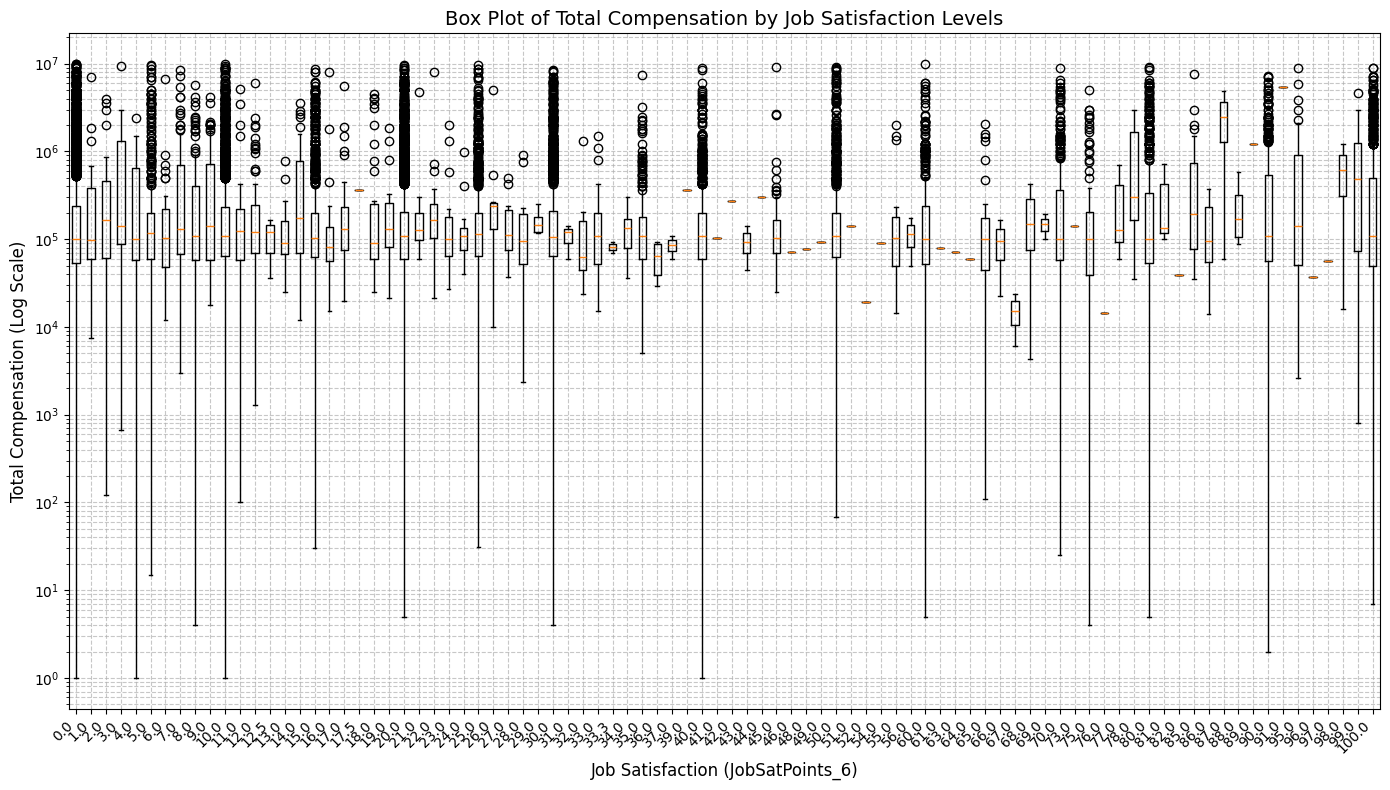

In [13]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')

# Query to select CompTotal and JobSatPoints_6
QUERY = """
SELECT CompTotal, JobSatPoints_6 
FROM main 
WHERE CompTotal IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""

# Load data into a DataFrame
df = pd.read_sql_query(QUERY, conn)

# Ensure CompTotal and JobSatPoints_6 are numeric, drop non-numeric values
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df = df.dropna(subset=['CompTotal', 'JobSatPoints_6'])

# Filter out non-positive CompTotal values to avoid log scale issues
df = df[df['CompTotal'] > 0]

# Optionally filter out extreme outliers (e.g., keep values below 10 million)
df = df[df['CompTotal'] < 1e7]  # Adjust threshold as needed

# Create a list of lists for box plot data, grouped by JobSatPoints_6
job_sat_levels = sorted(df['JobSatPoints_6'].unique())  # Sort for consistent order
box_plot_data = [df[df['JobSatPoints_6'] == level]['CompTotal'] for level in job_sat_levels]

# Create the box plot
plt.figure(figsize=(14, 8))  # Larger figure for legibility
plt.boxplot(box_plot_data, tick_labels=job_sat_levels, vert=True)
plt.yscale('log')  # Log scale for better visualization of compensation range
plt.title('Box Plot of Total Compensation by Job Satisfaction Levels', fontsize=14)
plt.xlabel('Job Satisfaction (JobSatPoints_6)', fontsize=12)
plt.ylabel('Total Compensation (Log Scale)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate labels for readability
plt.grid(True, which="both", ls="--", alpha=0.7)  # Grid for major/minor ticks
plt.tight_layout()  # Prevent label cutoff
plt.show()

# Close the database connection
conn.close()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


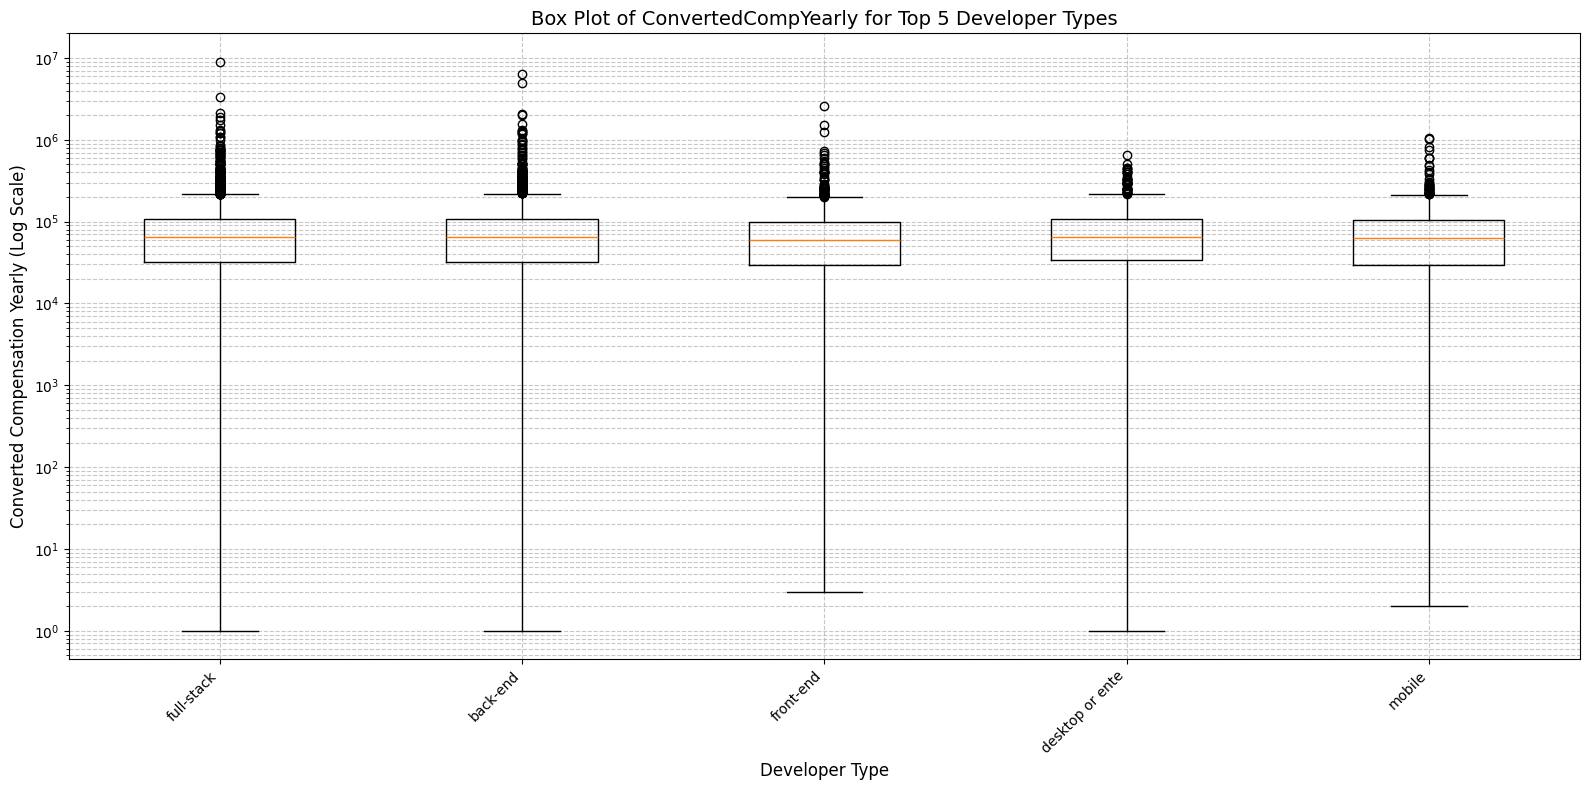

In [18]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
try:
    conn = sqlite3.connect('survey-results-public.sqlite')
except sqlite3.Error as e:
    print(f"Error connecting to database: {e}")
    exit()

# Query to select ConvertedCompYearly and DevType
QUERY = """
SELECT ConvertedCompYearly, DevType 
FROM main 
WHERE ConvertedCompYearly IS NOT NULL AND DevType IS NOT NULL
"""

# Load data into a DataFrame
try:
    df = pd.read_sql_query(QUERY, conn)
except Exception as e:
    print(f"Error querying database: {e}")
    conn.close()
    exit()

# Ensure ConvertedCompYearly is numeric, drop non-numeric values
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df = df.dropna(subset=['ConvertedCompYearly', 'DevType'])

# Filter out non-positive ConvertedCompYearly values for log scale
df = df[df['ConvertedCompYearly'] > 0]

# Optionally filter out extreme outliers (e.g., keep values below 10 million)
df = df[df['ConvertedCompYearly'] < 1e7]  # Adjust threshold as needed

# Split DevType entries (e.g., "Developer, full-stack;Developer, back-end") into individual roles
dev_types = df['DevType'].str.split(';', expand=True).stack().str.strip().reset_index(drop=True)

# Create a new DataFrame with one row per developer type per respondent
df_expanded = df.loc[df.index.repeat(df['DevType'].str.count(';') + 1)].copy()
df_expanded['DevType'] = dev_types

# Identify the top 5 developer types by frequency
top_5_dev_types = df_expanded['DevType'].value_counts().head(5).index.tolist()

# Shorten DevType labels for legibility
short_labels = [dev_type.replace('Developer, ', '').replace('Engineer, ', '')[:15] 
                for dev_type in top_5_dev_types]  # Truncate to 15 chars

# Filter the expanded DataFrame to include only the top 5 developer types
df_top_5 = df_expanded[df_expanded['DevType'].isin(top_5_dev_types)]

# Create a list of lists for box plot data, grouped by DevType
box_plot_data = [df_top_5[df_top_5['DevType'] == dev_type]['ConvertedCompYearly'] 
                 for dev_type in top_5_dev_types]

# Check if box_plot_data is empty
if not box_plot_data or any(len(data) == 0 for data in box_plot_data):
    print("Error: No data available for plotting. Check DevType or ConvertedCompYearly data.")
    conn.close()
    exit()

# Create the box plot
plt.figure(figsize=(16, 8))  # Larger figure for legibility
plt.boxplot(box_plot_data, tick_labels=short_labels, vert=True)
plt.yscale('log')  # Log scale for compensation range
plt.title('Box Plot of ConvertedCompYearly for Top 5 Developer Types', fontsize=14)
plt.xlabel('Developer Type', fontsize=12)
plt.ylabel('Converted Compensation Yearly (Log Scale)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate labels for readability
plt.grid(True, which="both", ls="--", alpha=0.7)  # Grid for major/minor ticks
plt.tight_layout()  # Prevent label cutoff
plt.show()

# Close the database connection
conn.close()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


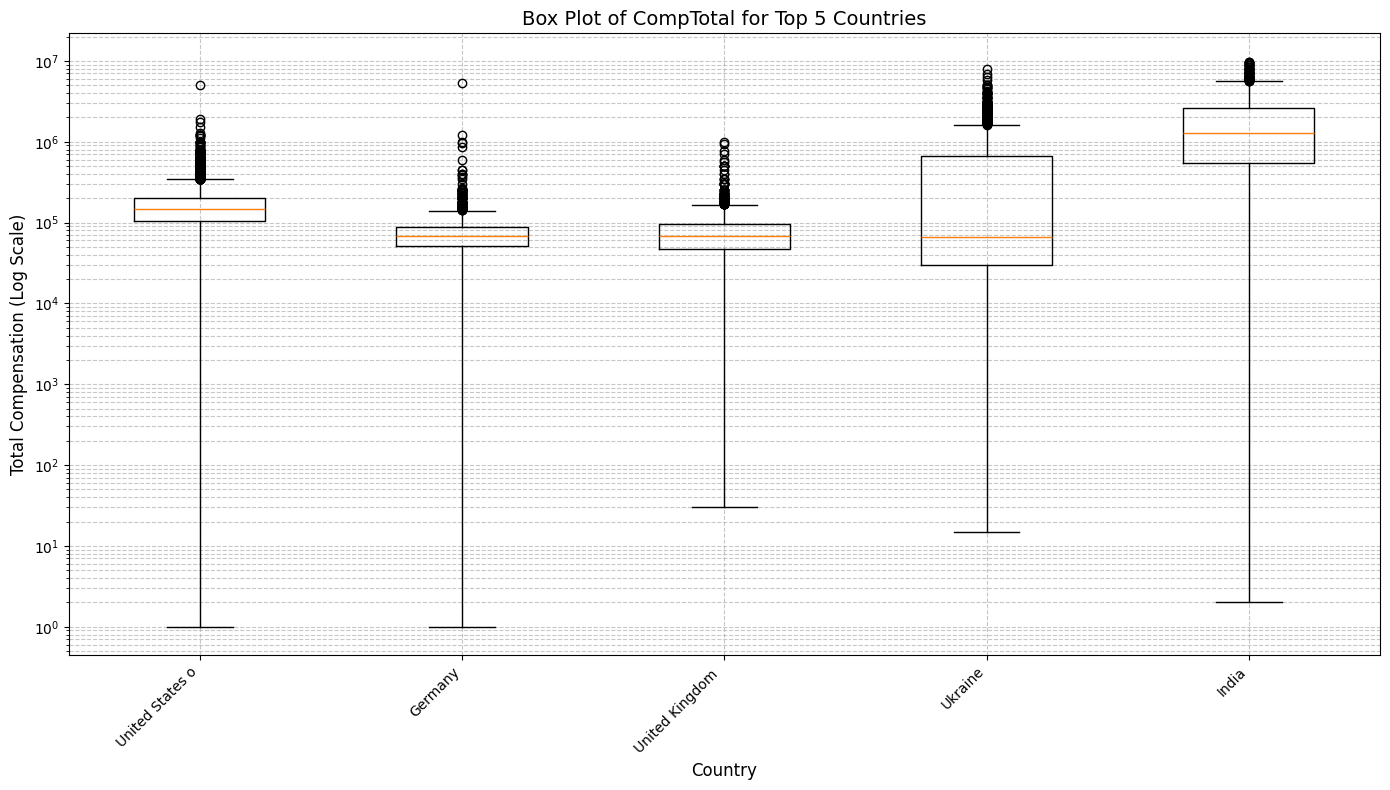

In [19]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
try:
    conn = sqlite3.connect('survey-results-public.sqlite')
except sqlite3.Error as e:
    print(f"Error connecting to database: {e}")
    exit()

# Query to select CompTotal and Country
QUERY = """
SELECT CompTotal, Country 
FROM main 
WHERE CompTotal IS NOT NULL AND Country IS NOT NULL
"""

# Load data into a DataFrame
try:
    df = pd.read_sql_query(QUERY, conn)
except Exception as e:
    print(f"Error querying database: {e}")
    conn.close()
    exit()

# Ensure CompTotal is numeric, drop non-numeric values
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal', 'Country'])

# Filter out non-positive CompTotal values for log scale
df = df[df['CompTotal'] > 0]

# Optionally filter out extreme outliers (e.g., keep values below 10 million)
df = df[df['CompTotal'] < 1e7]  # Adjust threshold as needed

# Identify the top 5 countries by frequency
top_5_countries = df['Country'].value_counts().head(5).index.tolist()

# Shorten country labels for legibility (e.g., truncate to 15 characters)
short_labels = [country[:15] for country in top_5_countries]  # Truncate to avoid overlap

# Filter the DataFrame to include only the top 5 countries
df_top_5 = df[df['Country'].isin(top_5_countries)]

# Create a list of lists for box plot data, grouped by Country
box_plot_data = [df_top_5[df_top_5['Country'] == country]['CompTotal'] 
                 for country in top_5_countries]

# Check if box_plot_data is empty
if not box_plot_data or any(len(data) == 0 for data in box_plot_data):
    print("Error: No data available for plotting. Check Country or CompTotal data.")
    conn.close()
    exit()

# Create the box plot
plt.figure(figsize=(14, 8))  # Larger figure for legibility
plt.boxplot(box_plot_data, tick_labels=short_labels, vert=True)
plt.yscale('log')  # Log scale for compensation range
plt.title('Box Plot of CompTotal for Top 5 Countries', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Compensation (Log Scale)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate labels for readability
plt.grid(True, which="both", ls="--", alpha=0.7)  # Grid for major/minor ticks
plt.tight_layout()  # Prevent label cutoff
plt.show()

# Close the database connection
conn.close()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


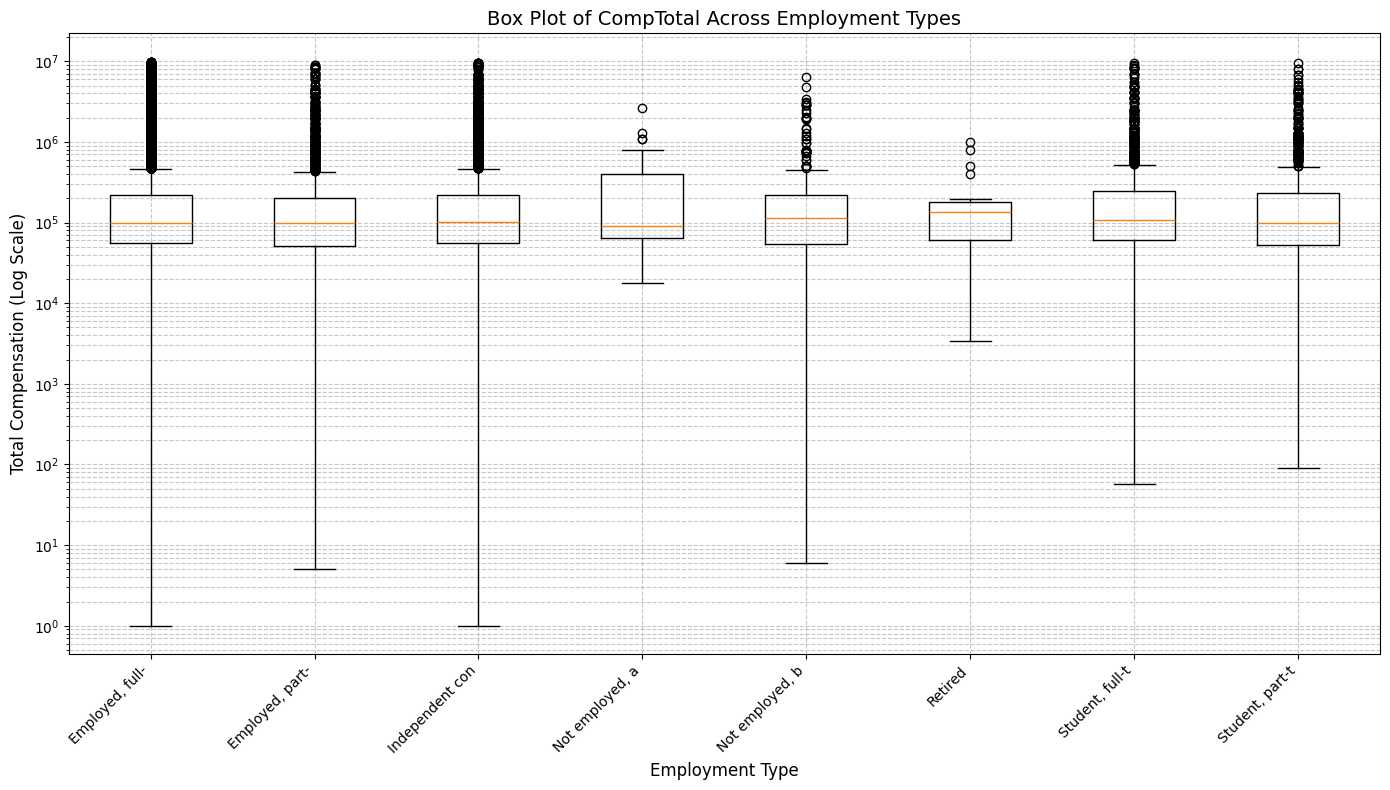

In [20]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
try:
    conn = sqlite3.connect('survey-results-public.sqlite')
except sqlite3.Error as e:
    print(f"Error connecting to database: {e}")
    exit()

# Query to select CompTotal and Employment
QUERY = """
SELECT CompTotal, Employment 
FROM main 
WHERE CompTotal IS NOT NULL AND Employment IS NOT NULL
"""

# Load data into a DataFrame
try:
    df = pd.read_sql_query(QUERY, conn)
except Exception as e:
    print(f"Error querying database: {e}")
    conn.close()
    exit()

# Ensure CompTotal is numeric, drop non-numeric values
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal', 'Employment'])

# Filter out non-positive CompTotal values for log scale
df = df[df['CompTotal'] > 0]

# Optionally filter out extreme outliers (e.g., keep values below 10 million)
df = df[df['CompTotal'] < 1e7]  # Adjust threshold as needed

# Split Employment entries (e.g., "Employed, full-time;Freelancer") into individual types
employment_types = df['Employment'].str.split(';', expand=True).stack().str.strip().reset_index(drop=True)

# Create a new DataFrame with one row per employment type per respondent
df_expanded = df.loc[df.index.repeat(df['Employment'].str.count(';') + 1)].copy()
df_expanded['Employment'] = employment_types

# Get unique employment types (no need for top 5, include all)
employment_types_unique = sorted(df_expanded['Employment'].unique())  # Sort for consistent order

# Shorten employment type labels for legibility (e.g., truncate to 15 characters)
short_labels = [emp_type[:15] for emp_type in employment_types_unique]  # Truncate to avoid overlap

# Create a list of lists for box plot data, grouped by Employment
box_plot_data = [df_expanded[df_expanded['Employment'] == emp_type]['CompTotal'] 
                 for emp_type in employment_types_unique]

# Check if box_plot_data is empty
if not box_plot_data or any(len(data) == 0 for data in box_plot_data):
    print("Error: No data available for plotting. Check Employment or CompTotal data.")
    conn.close()
    exit()

# Create the box plot
plt.figure(figsize=(14, 8))  # Larger figure for legibility
plt.boxplot(box_plot_data, tick_labels=short_labels, vert=True)
plt.yscale('log')  # Log scale for compensation range
plt.title('Box Plot of CompTotal Across Employment Types', fontsize=14)
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Total Compensation (Log Scale)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate labels for readability
plt.grid(True, which="both", ls="--", alpha=0.7)  # Grid for major/minor ticks
plt.tight_layout()  # Prevent label cutoff
plt.show()

# Close the database connection
conn.close()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


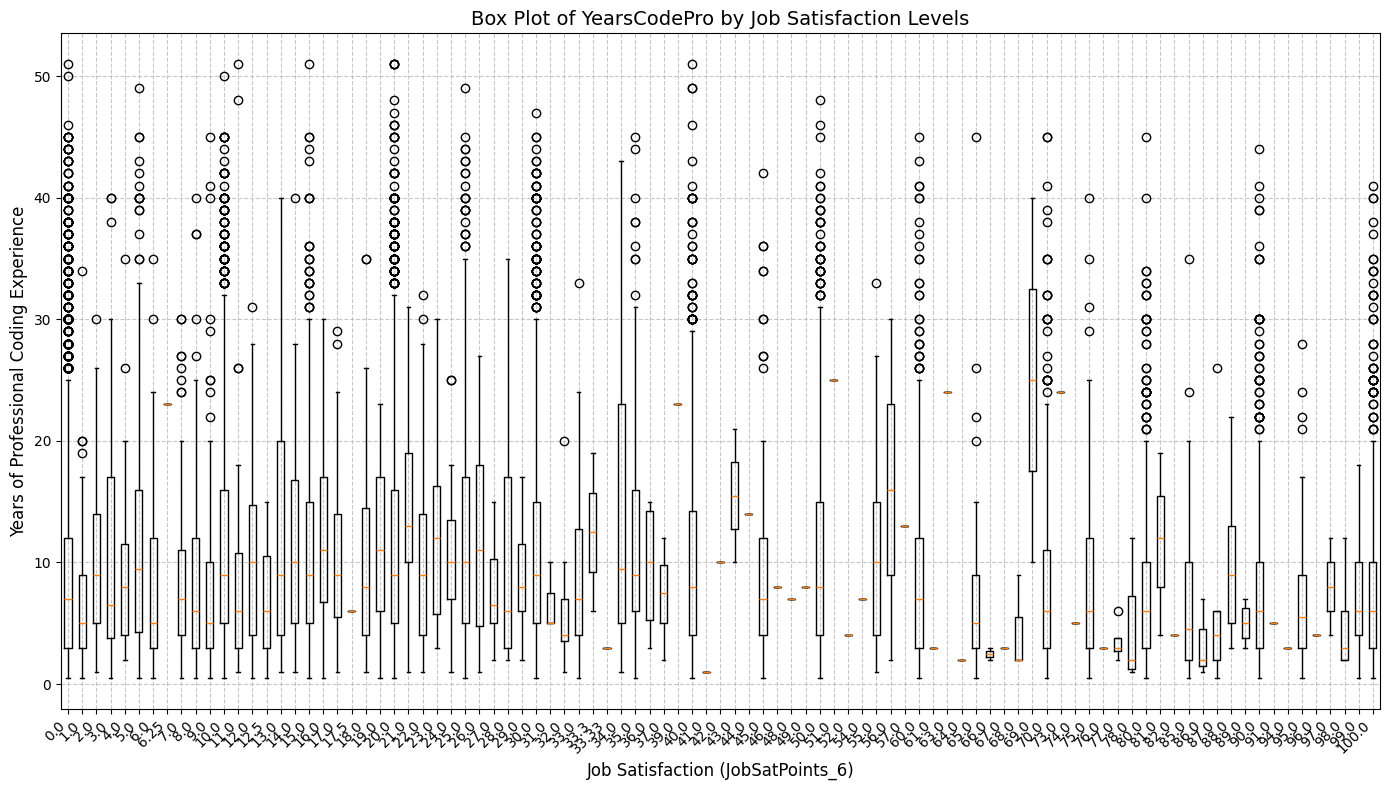

In [21]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
try:
    conn = sqlite3.connect('survey-results-public.sqlite')
except sqlite3.Error as e:
    print(f"Error connecting to database: {e}")
    exit()

# Query to select YearsCodePro and JobSatPoints_6
QUERY = """
SELECT YearsCodePro, JobSatPoints_6 
FROM main 
WHERE YearsCodePro IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""

# Load data into a DataFrame
try:
    df = pd.read_sql_query(QUERY, conn)
except Exception as e:
    print(f"Error querying database: {e}")
    conn.close()
    exit()

# Function to convert YearsCodePro to numeric
def convert_years_code_pro(years):
    try:
        if years == 'Less than 1 year':
            return 0.5
        elif years == 'More than 50 years':
            return 51
        return float(years)
    except (ValueError, TypeError):
        return None

# Apply conversion to YearsCodePro
df['YearsCodePro'] = df['YearsCodePro'].apply(convert_years_code_pro)

# Ensure JobSatPoints_6 is numeric
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Drop rows with missing or invalid values
df = df.dropna(subset=['YearsCodePro', 'JobSatPoints_6'])

# Get unique job satisfaction levels, sorted for consistent order
job_sat_levels = sorted(df['JobSatPoints_6'].unique())

# Create a list of lists for box plot data, grouped by JobSatPoints_6
box_plot_data = [df[df['JobSatPoints_6'] == level]['YearsCodePro'] 
                 for level in job_sat_levels]

# Check if box_plot_data is empty
if not box_plot_data or any(len(data) == 0 for data in box_plot_data):
    print("Error: No data available for plotting. Check YearsCodePro or JobSatPoints_6 data.")
    conn.close()
    exit()

# Create the box plot
plt.figure(figsize=(14, 8))  # Larger figure for legibility
plt.boxplot(box_plot_data, tick_labels=job_sat_levels, vert=True)
plt.title('Box Plot of YearsCodePro by Job Satisfaction Levels', fontsize=14)
plt.xlabel('Job Satisfaction (JobSatPoints_6)', fontsize=12)
plt.ylabel('Years of Professional Coding Experience', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate labels for readability
plt.grid(True, which="both", ls="--", alpha=0.7)  # Grid for major/minor ticks
plt.tight_layout()  # Prevent label cutoff
plt.show()

# Close the database connection
conn.close()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [22]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
